In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%pip install statsmodels
%pip install scikit-learn
import statsmodels.formula.api as smf
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --------------- ------------------------ 3.7/9.5 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 27.3 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   ------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
os.getcwd()

'c:\\Users\\anton\\STAT386\\Stat386_FinalProject\\src\\stat386_finalproject_divorce_crime\\notebooks'

In [5]:
df = pd.read_csv("../../data/Combined_DF.csv")

In [6]:
cols_to_drop = ['Unnamed: 0', 'index', 'Unnamed: 0.1']
df = df.drop(columns=cols_to_drop, errors = "ignore")

In [7]:
df.columns

Index(['state', 'year', 'V_actual', 'V_clearance_actual', 'ASS_actual',
       'ASS_clearance_actual', 'BUR_actual', 'BUR_clearance_actual',
       'LAR_actual', 'LAR_clearance_actual', 'MVT_actual',
       'MVT_clearance_actual', 'HOM_actual', 'HOM_clearance_actual',
       'RPE_actual', 'RPE_clearance_actual', 'ROB_actual',
       'ROB_clearance_actual', 'ARS_actual', 'ARS_clearance_actual',
       'P_actual', 'P_clearance_actual', 'V_rate', 'V_clearance_rate',
       'population', 'participated_population', 'ASS_rate',
       'ASS_clearance_rate', 'BUR_rate', 'BUR_clearance_rate', 'LAR_rate',
       'LAR_clearance_rate', 'MVT_rate', 'MVT_clearance_rate', 'HOM_rate',
       'HOM_clearance_rate', 'RPE_rate', 'RPE_clearance_rate', 'ROB_rate',
       'ROB_clearance_rate', 'ARS_rate', 'ARS_clearance_rate', 'P_rate',
       'P_clearance_rate', 'married_last_year', 'marriage_rate_per_1000',
       'divorced_last_year', 'divorce_rate_per_1000', 'population_over_15'],
      dtype='object')

In [8]:
df.head()

,state,year,V_actual,V_clearance_actual,ASS_actual,ASS_clearance_actual,BUR_actual,BUR_clearance_actual,LAR_actual,LAR_clearance_actual,...,ROB_clearance_rate,ARS_rate,ARS_clearance_rate,P_rate,P_clearance_rate,married_last_year,marriage_rate_per_1000,divorced_last_year,divorce_rate_per_1000,population_over_15
0,Alabama,2011,19666.0,7716.0,13204.0,5611.0,49629.0,6368.0,108787.0,23068.0,...,2.535000,1.418333,0.295000,302.635000,56.659167,75517,19.489475,50452.0,13.020684,3874758
1,Alabama,2012,21148.0,7262.0,14612.0,5488.0,46176.0,5399.0,108195.0,22184.0,...,2.129167,1.858333,0.307500,295.379167,52.746667,75260,19.366659,43374.0,11.161433,3886060
2,Alabama,2013,19725.0,8953.0,13041.0,6263.0,39860.0,5853.0,103176.0,25400.0,...,3.084167,1.404167,0.250833,283.402500,62.026667,70223,17.955264,47974.0,12.266434,3910998
3,Alabama,2014,19603.0,8945.0,12970.0,6209.0,37397.0,5496.0,98385.0,25870.0,...,3.077500,2.261667,0.386667,266.225833,61.866667,71382,18.154277,38997.0,9.917939,3931966
4,Alabama,2015,22117.0,8915.0,15315.0,6331.0,33854.0,4886.0,95735.0,23374.0,...,2.838333,1.367500,0.220000,249.524167,55.108333,66541,16.857756,39540.0,10.017217,3947204


In [9]:
df.describe()

,year,V_actual,V_clearance_actual,ASS_actual,ASS_clearance_actual,BUR_actual,BUR_clearance_actual,LAR_actual,LAR_clearance_actual,MVT_actual,...,ROB_clearance_rate,ARS_rate,ARS_clearance_rate,P_rate,P_clearance_rate,married_last_year,marriage_rate_per_1000,divorced_last_year,divorce_rate_per_1000,population_over_15
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,649.000000,649.000000,6.500000e+02
mean,2017.307692,23720.430769,10129.383077,15475.250769,7675.244615,26914.852308,3496.124615,101518.416923,19017.293846,15141.889231,...,1.661336,1.183187,0.373890,192.909051,35.536713,90535.744615,17.624295,41396.479199,8.261029,5.279007e+06
std,4.124126,30262.808852,13268.548563,19282.513535,9788.877777,35327.607712,4496.607129,117792.148341,20722.295562,24701.795806,...,1.018243,0.523078,2.509517,56.952857,14.529736,99410.015150,2.816701,42824.313437,1.844582,5.858475e+06
min,2011.000000,636.000000,444.000000,438.000000,363.000000,680.000000,124.000000,3451.000000,502.000000,173.000000,...,0.051667,0.012500,0.007500,37.052500,0.635000,5007.000000,9.533311,2451.000000,4.340847,4.545810e+05
25%,2014.000000,4828.000000,2575.500000,3291.000000,2057.250000,6228.500000,843.750000,24440.000000,5176.500000,3216.500000,...,0.905000,0.779583,0.191250,149.226250,25.080833,25960.750000,15.731991,12991.000000,6.854958,1.506202e+06
50%,2017.000000,16310.000000,6826.500000,10475.000000,5309.500000,16875.500000,2175.000000,69010.500000,12518.000000,9805.500000,...,1.456250,1.113750,0.262500,187.754583,34.512083,64651.000000,17.395964,30948.000000,8.073335,3.689064e+06
75%,2021.000000,28312.250000,11408.500000,18497.500000,9002.000000,31986.250000,4182.500000,123382.750000,25016.250000,16532.000000,...,2.208750,1.494583,0.332292,236.367500,44.896250,110084.250000,19.237956,50229.000000,9.441069,6.148168e+06
max,2024.000000,201266.000000,80595.000000,135180.000000,62063.000000,245645.000000,30399.000000,655952.000000,118278.000000,198262.000000,...,5.355000,2.992500,64.168333,333.395000,110.980000,556876.000000,29.021453,239728.000000,14.497435,3.258990e+07


Exploratory Data Analysis

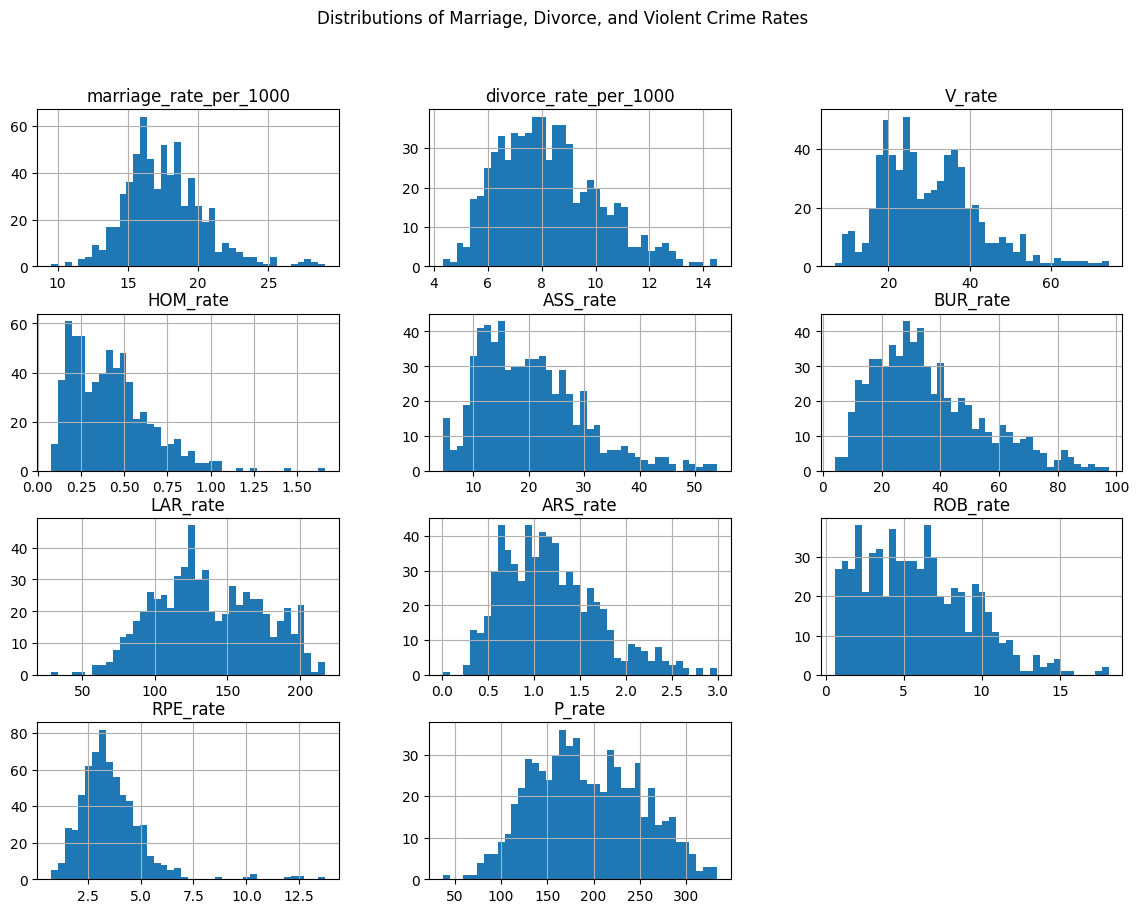

In [10]:
# Check for Any Missing Values
#print(df.isnull().sum())

# Histograms
rate_vars = [
    "marriage_rate_per_1000",
    "divorce_rate_per_1000",
    "V_rate", "HOM_rate", "ASS_rate", "BUR_rate", 
    "LAR_rate", "ARS_rate", "ROB_rate", "RPE_rate", "P_rate"
]

df[rate_vars].hist(bins=40, figsize=(14,10))
plt.suptitle("Distributions of Marriage, Divorce, and Violent Crime Rates")

# Save the figure
plt.savefig("../../../docs/images/histogram.png", dpi = 300, bbox_inches = "tight")

plt.show()

All of our rates appear to be slightly right skewed to extremely right skewed.

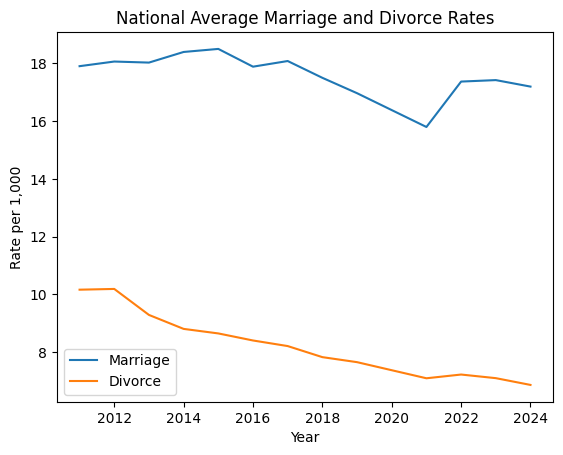

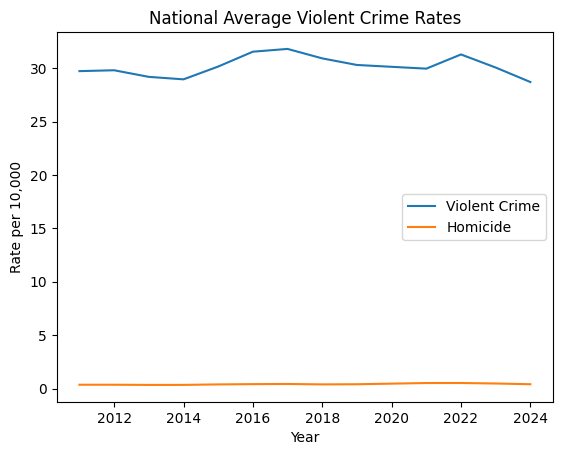

In [11]:
national = (
    df.groupby("year")[rate_vars]
    .mean()
    .reset_index()
)

plt.figure()
plt.plot(national["year"], national["marriage_rate_per_1000"], label="Marriage")
plt.plot(national["year"], national["divorce_rate_per_1000"], label="Divorce")
plt.title("National Average Marriage and Divorce Rates")
plt.xlabel("Year")
plt.ylabel("Rate per 1,000")
plt.legend()
plt.show()

plt.figure()
plt.plot(national["year"], national["V_rate"], label="Violent Crime")
plt.plot(national["year"], national["HOM_rate"], label="Homicide")
plt.title("National Average Violent Crime Rates")
plt.xlabel("Year")
plt.ylabel("Rate per 10,000")
plt.legend()
plt.show()

Violent Crimes appear to remain roughly the same while, marriage and divorce seem to be declining over the years.

Looking into 

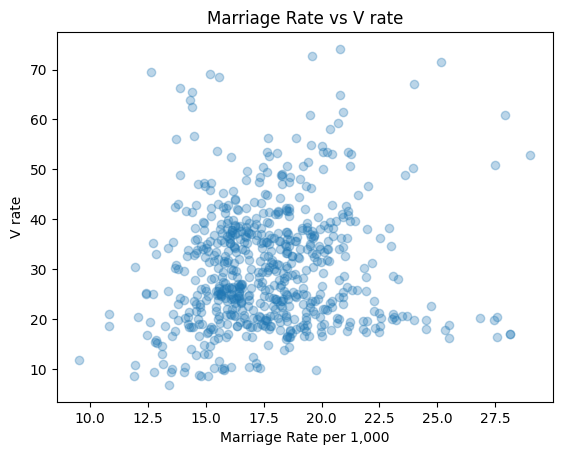

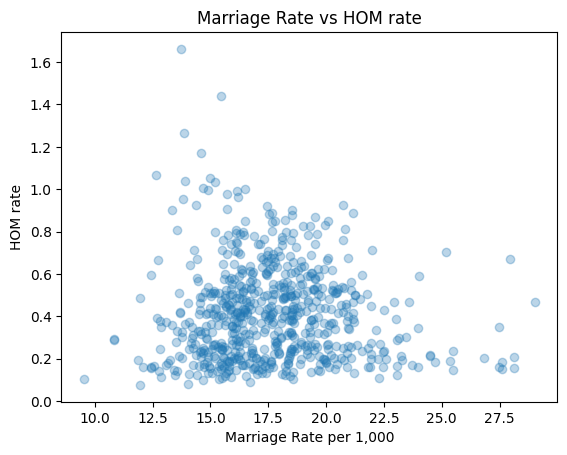

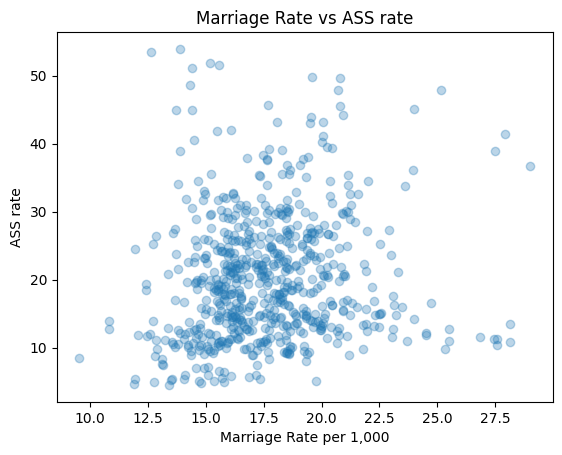

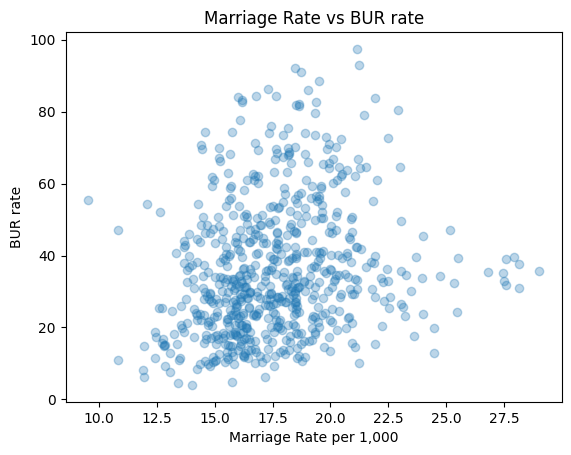

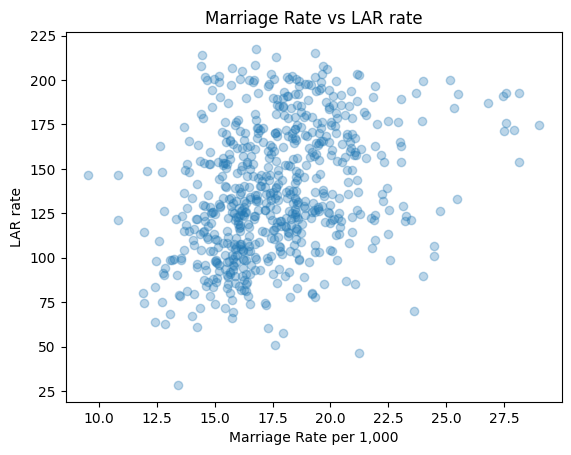

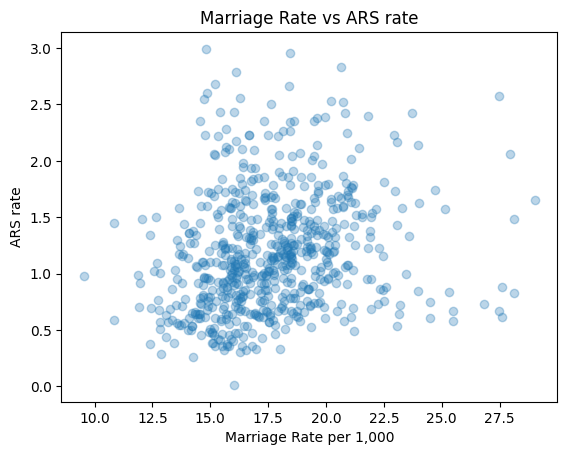

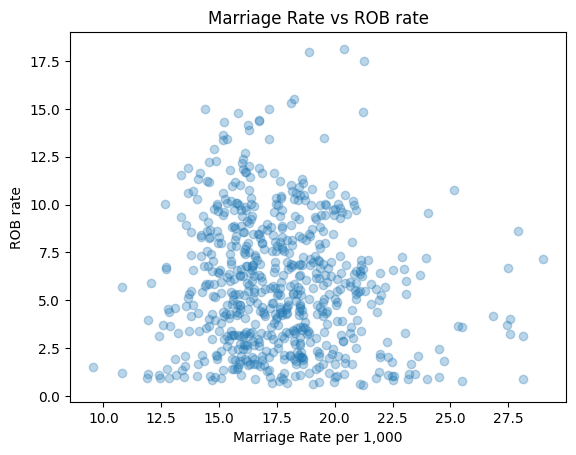

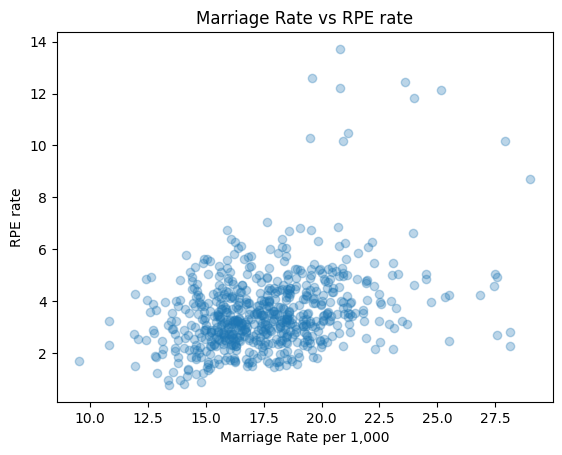

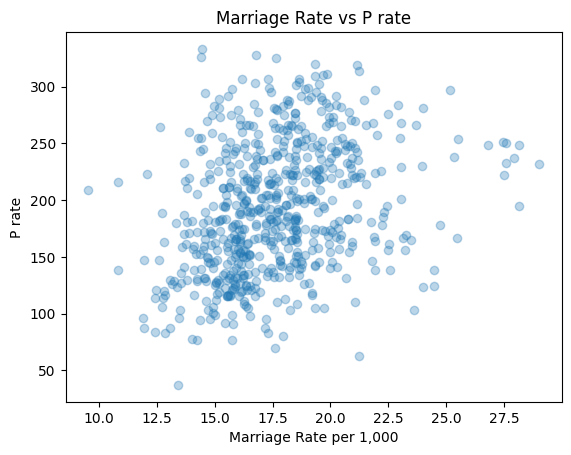

In [12]:
#single_point = df[(df['year'] == 2019) & (df['state'] == "Utah")]
#print(single_point['V_clearance_rate'])
#print(single_point['V_clearance_actual']/single_point['population']*10000)

violent_crimes = ["V_rate", "HOM_rate", "ASS_rate", "BUR_rate", 
                  "LAR_rate", "ARS_rate", "ROB_rate", "RPE_rate", 
                  "P_rate"]

for crime in violent_crimes:
    plt.figure()
    plt.scatter(df["marriage_rate_per_1000"], df[crime], alpha=0.3)
    plt.xlabel("Marriage Rate per 1,000")
    plt.ylabel(crime.replace("_", " "))
    plt.title(f"Marriage Rate vs {crime.replace('_', ' ')}")
    plt.show()

Is there any correlation between the rates?

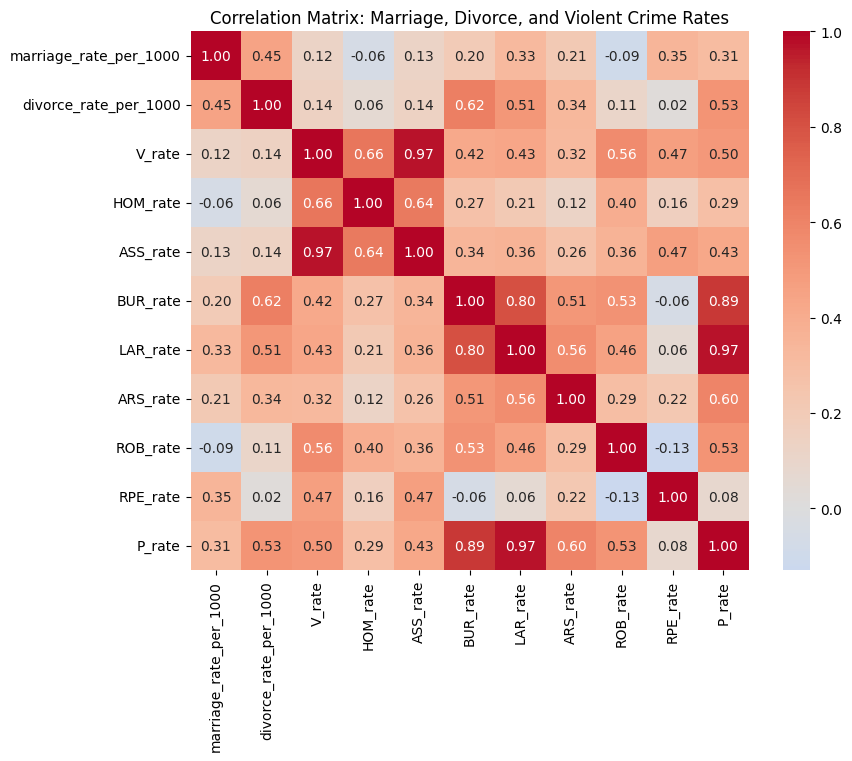

In [13]:
rate_vars = [
    "marriage_rate_per_1000",
    "divorce_rate_per_1000",
    "V_rate", "HOM_rate", "ASS_rate", "BUR_rate", 
    "LAR_rate", "ARS_rate", "ROB_rate", "RPE_rate", "P_rate"
]

corr = df[rate_vars].corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Marriage, Divorce, and Violent Crime Rates")

plt.savefig("../../../docs/images/Correlation-Matrix-Rates.png", dpi = 300, bbox_inches = "tight")


plt.show()

Is there any correlation between conviction rates and marriage and divorce rates?

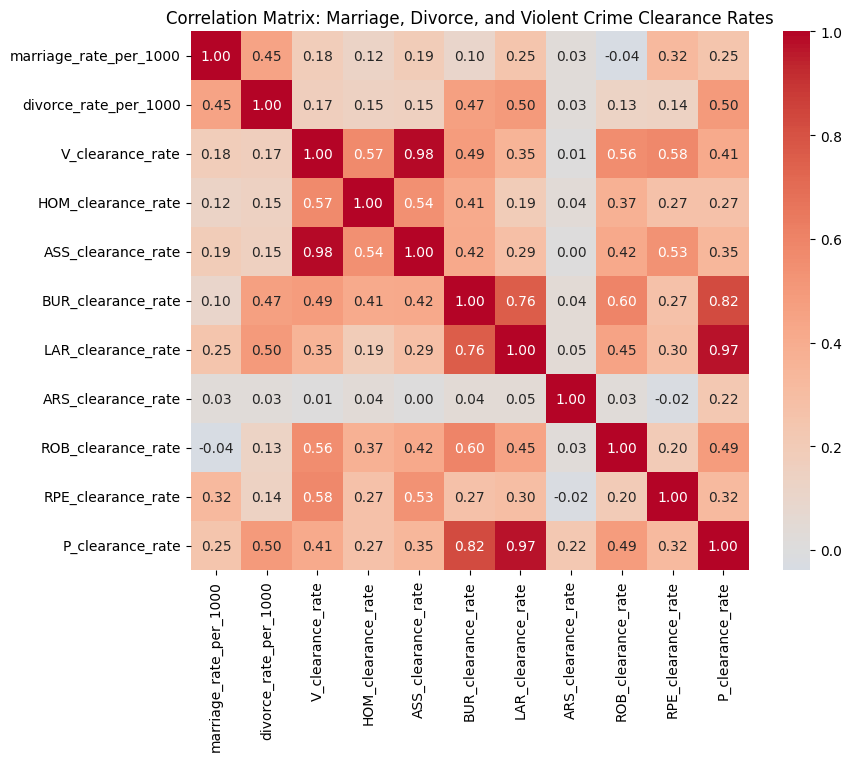

In [14]:
clearence_vars = [
    "marriage_rate_per_1000",
    "divorce_rate_per_1000",
    "V_clearance_rate", "HOM_clearance_rate", "ASS_clearance_rate", 
    "BUR_clearance_rate", "LAR_clearance_rate", "ARS_clearance_rate", 
    "ROB_clearance_rate", "RPE_clearance_rate", "P_clearance_rate"
]

corr = df[clearence_vars].corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Marriage, Divorce, and Violent Crime Clearance Rates")

plt.savefig("../../../docs/images/Correlation-Matrix-Clearance.png", dpi = 300, bbox_inches = "tight")


plt.show()

Compare Highest vs Lowest divorce states

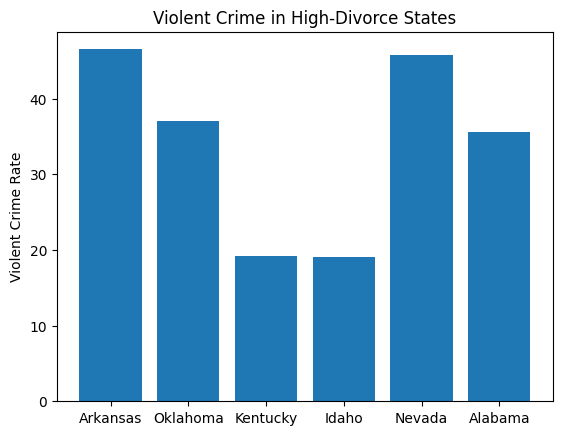

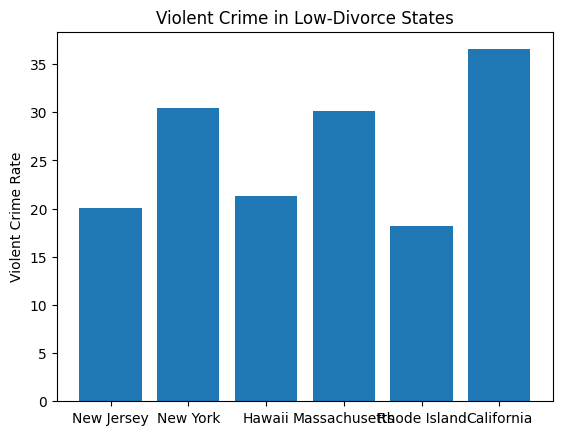

In [15]:
state_avg = (
    df.groupby("state")[rate_vars]
    .mean()
    .reset_index()
)

high_divorce = state_avg.nlargest(6, "divorce_rate_per_1000")
low_divorce = state_avg.nsmallest(6, "divorce_rate_per_1000")

high_divorce

plt.figure()
plt.bar(high_divorce["state"], high_divorce["V_rate"])
plt.title("Violent Crime in High-Divorce States")
plt.ylabel("Violent Crime Rate")
plt.show()

plt.figure()
plt.bar(low_divorce["state"], low_divorce["V_rate"])
plt.title("Violent Crime in Low-Divorce States")
plt.ylabel("Violent Crime Rate")
plt.show()


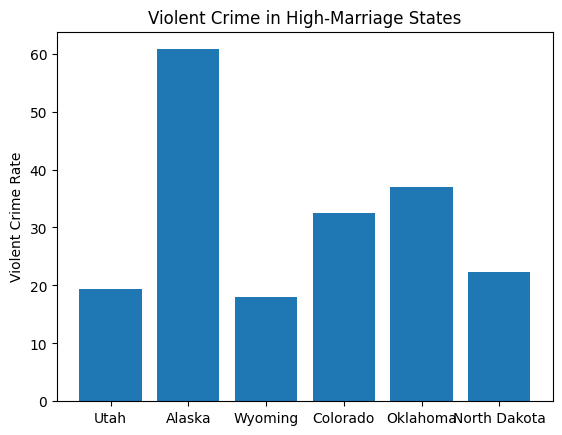

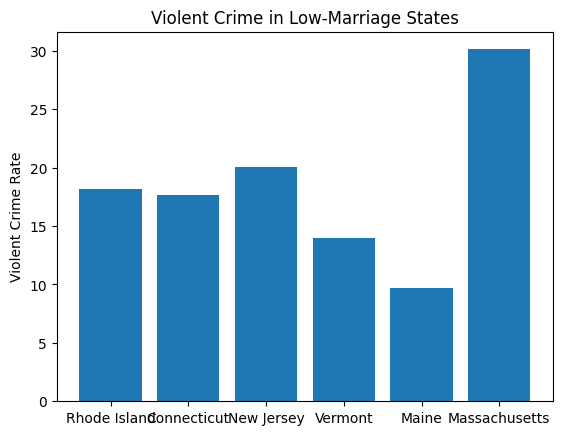

In [16]:
state_avg = (
    df.groupby("state")[rate_vars]
    .mean()
    .reset_index()
)

high_marriage = state_avg.nlargest(6, "marriage_rate_per_1000")
low_marriage = state_avg.nsmallest(6, "marriage_rate_per_1000")


plt.figure()
plt.bar(high_marriage["state"], high_marriage["V_rate"])
plt.title("Violent Crime in High-Marriage States")
plt.ylabel("Violent Crime Rate")
plt.show()

plt.figure()
plt.bar(low_marriage["state"], low_marriage["V_rate"])
plt.title("Violent Crime in Low-Marriage States")
plt.ylabel("Violent Crime Rate")
plt.show()


In [38]:
def linear_regression_by_crime_rate(df: pd.DataFrame, crime: str):

    # Define variables used in model
    vars_needed = [
        crime,
        "marriage_rate_per_1000",
        "divorce_rate_per_1000",
        "state",
        "year"
    ]

    # Drop missing rows FIRST
    df_model = (
        df[vars_needed]
        .dropna()
        .sort_values(["state", "year"])
        .copy()
    )

    model = smf.ols(
        f"{crime} ~ marriage_rate_per_1000 + divorce_rate_per_1000 + C(state) + C(year)",
        data=df_model
    ).fit(
        cov_type="cluster",
        cov_kwds={"groups": df_model["state"]}
    )

    return model


def linear_regression_by_marriage_divorce(
    df: pd.DataFrame,
    marriage_true: bool
):
    if marriage_true:
        outcome = "marriage_rate_per_1000"
        rate_vars = ["LAR_rate", "RPE_rate"]
    else:
        outcome = "divorce_rate_per_1000"
        rate_vars = ["BUR_rate", "ARS_rate"]

    vars_needed = [outcome] + rate_vars + ["state", "year"]

    # DROP NAs FIRST
    df_model = (
        df[vars_needed]
        .dropna()
        .sort_values(["state", "year"])
        .copy()
    )

    rhs = " + ".join(rate_vars + ["C(state)", "C(year)"])
    formula = f"{outcome} ~ {rhs}"

    model = smf.ols(
        formula,
        data=df_model
    ).fit(
        cov_type="cluster",
        cov_kwds={"groups": df_model["state"]}
    )

    return model

In [39]:
model = linear_regression_by_marriage_divorce(df, marriage_true=True)
model2 = linear_regression_by_marriage_divorce(df, marriage_true=False)

print(model.summary())
print(model2.summary())

                              OLS Regression Results                              
Dep. Variable:     marriage_rate_per_1000   R-squared:                       0.737
Model:                                OLS   Adj. R-squared:                  0.709
Method:                     Least Squares   F-statistic:                     24.54
Date:                    Wed, 17 Dec 2025   Prob (F-statistic):           2.22e-17
Time:                            17:34:33   Log-Likelihood:                -1161.0
No. Observations:                     650   AIC:                             2450.
Df Residuals:                         586   BIC:                             2737.
Df Model:                              63                                         
Covariance Type:                  cluster                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

c:\Users\anton\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 63, but rank is 14
  warnings.warn('covariance of constraints does not have full '
c:\Users\anton\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 63, but rank is 14
  warnings.warn('covariance of constraints does not have full '
